In [1]:
from matplotlib import rc

import matplotlib.pyplot as plt
import pandas as pd

chunk_size = 100000  
chunks = pd.read_csv("./mapped_data/mapped_merged_data.csv", chunksize=chunk_size)
merged_data = pd.concat(chunks, ignore_index=True)

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Users\SYU\AppData\Local\Temp\ipykernel_21904\3340049134.py:8: DtypeWarning: Columns (0,8,9,16,30) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.concat(chunks, ignore_index=True)
C:\Users\SYU\AppData\Local\Temp\ipykernel_21904\3340049134.py:8: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.concat(chunks, ignore_index=True)
C:\Users\SYU\AppData\Local\Temp\ipykernel_21904\3340049134.py:8: DtypeWarning: Columns (0,8,9,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.concat(chunks, ignore_index=True)
C:\Users\SYU\AppData\Local\Temp\ipykernel_21904\3340049134.py:8: DtypeWarning: Columns (9,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.concat(chunks, ignore_index=True)
C:\Users\SYU\AppData\Local\Temp\ipykernel_21904\3340049134.py:8: DtypeWarning: Columns (0,8,9,29) h

In [5]:
merged_data.head(5)

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,...,ROAD_NM_ADDR_POI,LOTNO_ADDR_POI,ASORT_LCLASDC,ASORT_MLSFCDC,ASORT_SDASDC,X_COORD,Y_COORD,ROAD_NM_CD_POI,LOTNO_CD_POI,region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,129.241828,35.258303,,,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,129.231415,35.274090,,,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,126.606681,33.239168,,,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,127.573139,37.319583,,,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,127.557392,37.292375,,,NaN


In [2]:
merged_data.dtypes

TRAVEL_ID             object
VISIT_AREA_ID        float64
ACTIVITY_TYPE_CD     float64
ACTIVITY_TYPE_SEQ    float64
CONSUME_HIS_SEQ      float64
CONSUME_HIS_SNO      float64
PAYMENT_NUM          float64
BRNO                 float64
STORE_NM              object
ROAD_NM_ADDR          object
LOTNO_ADDR            object
ROAD_NM_CD           float64
LOTNO_CD             float64
PAYMENT_DT            object
PAYMENT_MTHD_SE      float64
PAYMENT_AMT_WON      float64
PAYMENT_ETC           object
SGG_CD                 int64
POI_ID                object
POI_NM                object
BRNO_POI              object
ROAD_NM_ADDR_POI      object
LOTNO_ADDR_POI        object
ASORT_LCLASDC        float64
ASORT_MLSFCDC        float64
ASORT_SDASDC         float64
X_COORD              float64
Y_COORD              float64
ROAD_NM_CD_POI        object
LOTNO_CD_POI          object
region                object
dtype: object

In [6]:
import pandas as pd
# region 열을 One-Hot Encoding 적용
merged_data = pd.get_dummies(merged_data, columns=['region'], prefix='region')

# 결과 확인
print(merged_data.head())

  TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD  ACTIVITY_TYPE_SEQ  \
0       NaN            NaN               NaN                NaN   
1       NaN            NaN               NaN                NaN   
2       NaN            NaN               NaN                NaN   
3       NaN            NaN               NaN                NaN   
4       NaN            NaN               NaN                NaN   

   CONSUME_HIS_SEQ  CONSUME_HIS_SNO  PAYMENT_NUM  BRNO STORE_NM ROAD_NM_ADDR  \
0              NaN              NaN          NaN   NaN      NaN          NaN   
1              NaN              NaN          NaN   NaN      NaN          NaN   
2              NaN              NaN          NaN   NaN      NaN          NaN   
3              NaN              NaN          NaN   NaN      NaN          NaN   
4              NaN              NaN          NaN   NaN      NaN          NaN   

   ... region_부산광역시  region_서울특별시  region_세종특별자치시 region_울산광역시  region_인천광역시  \
0  ...        False         False   

In [13]:
import pandas as pd

# 각 열별 결측치 개수 확인
missing_counts = merged_data.isnull().sum()

# 전체 데이터 개수
total_rows = len(merged_data)

# 결측치 비율 계산
missing_ratios = (missing_counts / total_rows) * 100

# 결과 출력
missing_info = pd.DataFrame({"Missing Values": missing_counts, "Missing Ratio (%)": missing_ratios})
print(missing_info)

# 결측치가 있는 열만 출력
missing_info = missing_info[missing_info["Missing Values"] > 0]
print("\nColumns with missing values:")
print(missing_info)


                   Missing Values  Missing Ratio (%)
TRAVEL_ID                 7442866          98.849432
VISIT_AREA_ID             7442866          98.849432
ACTIVITY_TYPE_CD          7442866          98.849432
ACTIVITY_TYPE_SEQ         7442866          98.849432
CONSUME_HIS_SEQ           7442866          98.849432
CONSUME_HIS_SNO           7442866          98.849432
PAYMENT_NUM               7442866          98.849432
BRNO                      7462918          99.115745
STORE_NM                  7443657          98.859937
ROAD_NM_ADDR              7452490          98.977249
LOTNO_ADDR                7476266          99.293021
ROAD_NM_CD                7459623          99.071983
LOTNO_CD                  7459623          99.071983
PAYMENT_DT                7456960          99.036616
PAYMENT_MTHD_SE           7443284          98.854983
PAYMENT_AMT_WON           7442894          98.849804
PAYMENT_ETC               7476360          99.294269
SGG_CD                          0           0.

In [14]:
# 유효한 데이터 개수 (결측치가 아닌 값 개수)
valid_counts = merged_data.notnull().sum()

# 전체 행 개수
total_rows = len(merged_data)

# 유효한 데이터 비율 계산
valid_ratios = (valid_counts / total_rows) * 100

# 결과 출력
valid_info = pd.DataFrame({"Valid Values": valid_counts, "Valid Ratio (%)": valid_ratios})
print(valid_info)

# 유효한 데이터가 있는 열만 출력
valid_info = valid_info[valid_info["Valid Values"] > 0]
print("\nColumns with valid values:")
print(valid_info)


                   Valid Values  Valid Ratio (%)
TRAVEL_ID                 86632         1.150568
VISIT_AREA_ID             86632         1.150568
ACTIVITY_TYPE_CD          86632         1.150568
ACTIVITY_TYPE_SEQ         86632         1.150568
CONSUME_HIS_SEQ           86632         1.150568
CONSUME_HIS_SNO           86632         1.150568
PAYMENT_NUM               86632         1.150568
BRNO                      66580         0.884255
STORE_NM                  85841         1.140063
ROAD_NM_ADDR              77008         1.022751
LOTNO_ADDR                53232         0.706979
ROAD_NM_CD                69875         0.928017
LOTNO_CD                  69875         0.928017
PAYMENT_DT                72538         0.963384
PAYMENT_MTHD_SE           86214         1.145017
PAYMENT_AMT_WON           86604         1.150196
PAYMENT_ETC               53138         0.705731
SGG_CD                  7529498       100.000000
POI_ID                  7442866        98.849432
POI_NM              

In [3]:
# X_COORD, Y_COORD를 중앙값(median)으로 채우기
merged_data = merged_data.assign(
    X_COORD=merged_data["X_COORD"].fillna(merged_data["X_COORD"].median()),
    Y_COORD=merged_data["Y_COORD"].fillna(merged_data["Y_COORD"].median())
)

# 0으로 채울 연속형 변수
zero_fill_columns = [
    "VISIT_AREA_ID", "ACTIVITY_TYPE_CD", "ACTIVITY_TYPE_SEQ",
    "CONSUME_HIS_SEQ", "CONSUME_HIS_SNO", "PAYMENT_NUM",
    "BRNO", "ROAD_NM_CD", "LOTNO_CD", "PAYMENT_MTHD_SE",
    "PAYMENT_AMT_WON", "ASORT_LCLASDC", "ASORT_MLSFCDC", "ASORT_SDASDC"
]
merged_data[zero_fill_columns] = merged_data[zero_fill_columns].fillna(0)

# Object 타입 데이터 'Unknown'으로 채우기
object_fill_columns = [
    "TRAVEL_ID", "STORE_NM", "ROAD_NM_ADDR", "LOTNO_ADDR",
    "PAYMENT_DT", "PAYMENT_ETC", "POI_ID", "POI_NM",
    "BRNO_POI", "ROAD_NM_ADDR_POI", "LOTNO_ADDR_POI",
    "ROAD_NM_CD_POI", "LOTNO_CD_POI"
]
merged_data[object_fill_columns] = merged_data[object_fill_columns].fillna("Unknown")

# 지역 One-Hot Encoding 열(region_*)을 0으로 채우기
region_columns = [col for col in merged_data.columns if col.startswith("region_")]
merged_data[region_columns] = merged_data[region_columns].fillna(0)

# 결측치 처리 후 확인
missing_summary = merged_data.isnull().sum()
print("결측치 처리 후 남아있는 결측값 개수:")
print(missing_summary[missing_summary > 0])


결측치 처리 후 남아있는 결측값 개수:
region    646262
dtype: int64


In [7]:
merged_data["region"] = merged_data["region"].fillna(0)

In [12]:
merged_data.dtypes

TRAVEL_ID             object
VISIT_AREA_ID        float64
ACTIVITY_TYPE_CD     float64
ACTIVITY_TYPE_SEQ    float64
CONSUME_HIS_SEQ      float64
CONSUME_HIS_SNO      float64
PAYMENT_NUM          float64
BRNO                 float64
STORE_NM              object
ROAD_NM_ADDR          object
LOTNO_ADDR            object
ROAD_NM_CD           float64
LOTNO_CD             float64
PAYMENT_DT            object
PAYMENT_MTHD_SE      float64
PAYMENT_AMT_WON      float64
PAYMENT_ETC           object
SGG_CD                 int64
POI_ID                object
POI_NM                object
BRNO_POI              object
ROAD_NM_ADDR_POI      object
LOTNO_ADDR_POI        object
ASORT_LCLASDC        float64
ASORT_MLSFCDC        float64
ASORT_SDASDC         float64
X_COORD              float64
Y_COORD              float64
ROAD_NM_CD_POI        object
LOTNO_CD_POI          object
region                object
dtype: object

In [8]:
print(f"총 결측치 개수: {merged_data.isnull().sum().sum()}")


총 결측치 개수: 0


In [14]:

merged_data["region"] = merged_data["region"].astype("category")

C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) mi

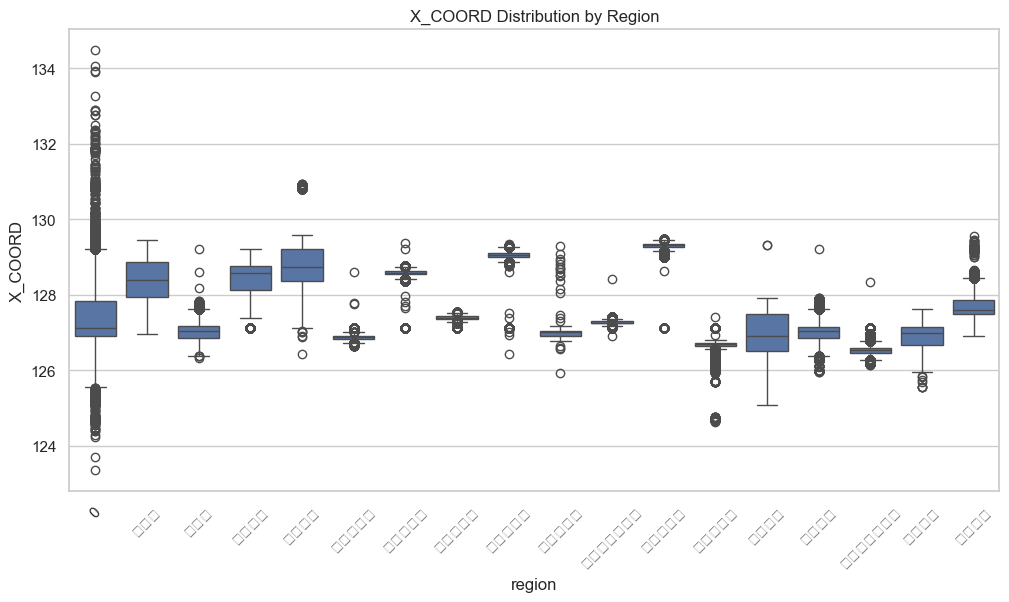

C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) mi

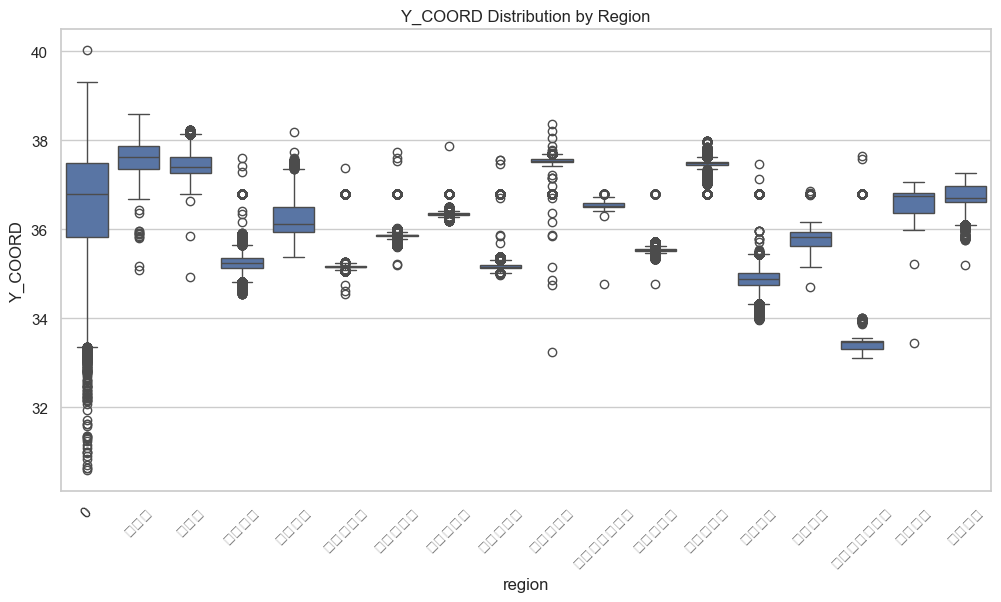

C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) mi

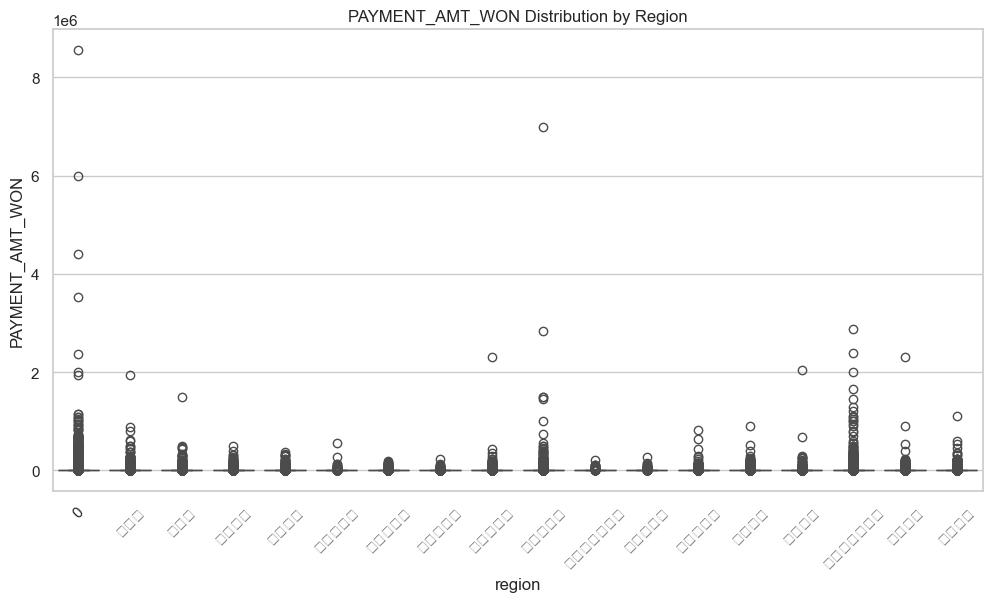

C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) mi

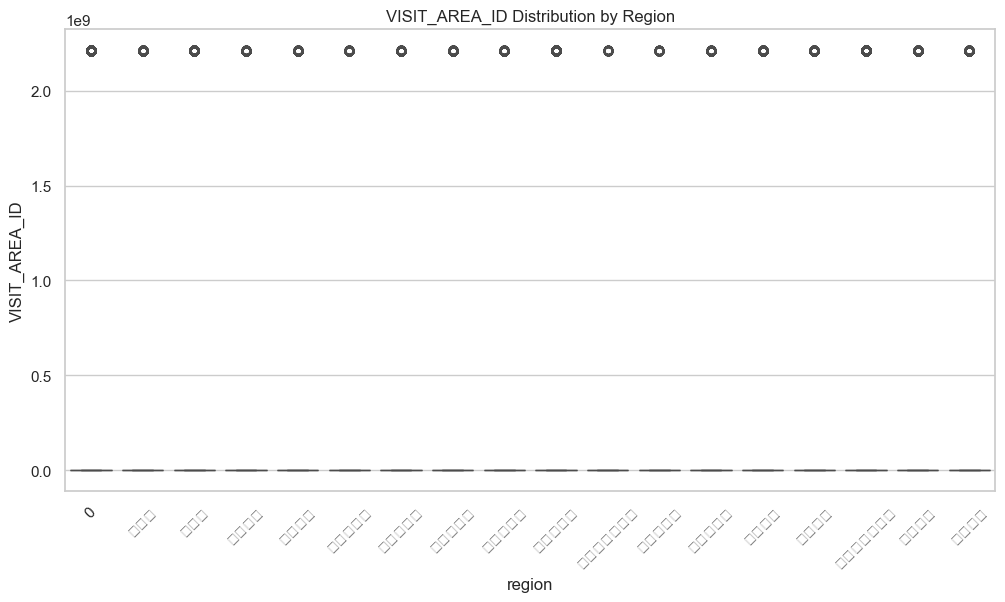

C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SYU\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) mi

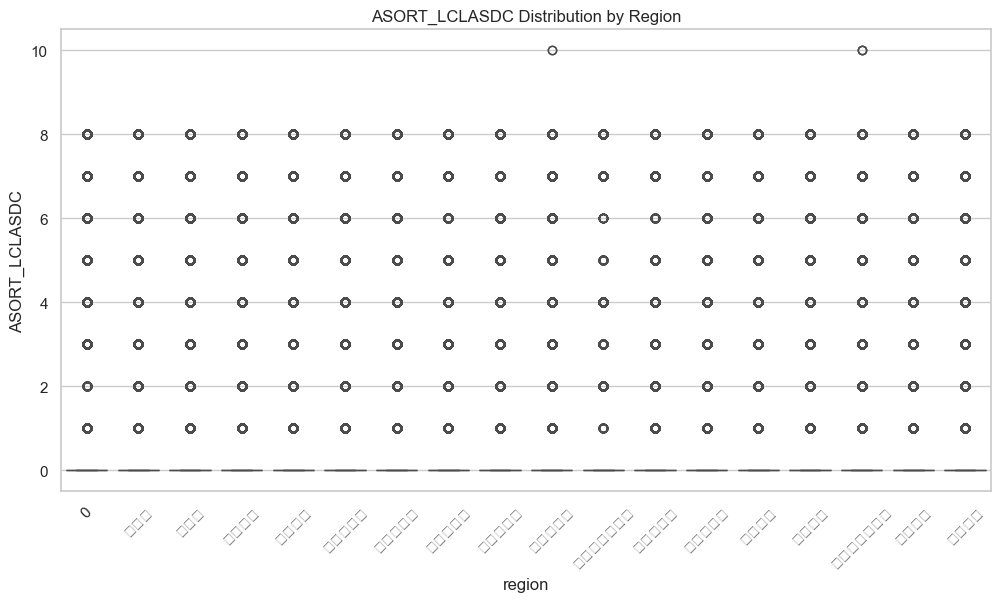

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot을 볼 연속형 변수 리스트
boxplot_columns = ["X_COORD", "Y_COORD", "PAYMENT_AMT_WON", "VISIT_AREA_ID", "ASORT_LCLASDC"]

for col in boxplot_columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x="region", y=col, data=merged_data)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution by Region")
    plt.show()



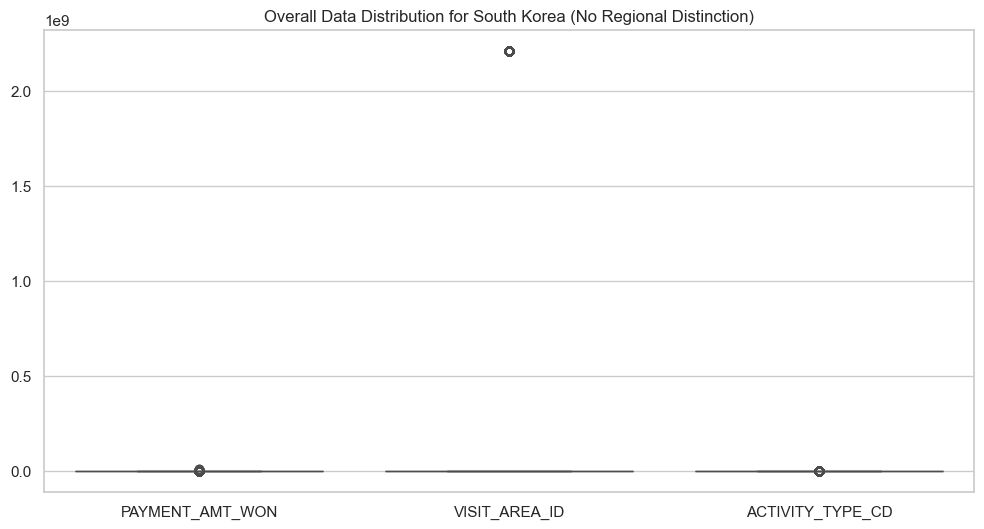

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot을 위한 주요 수치형 변수 (대한민국 전체 데이터 기준)
boxplot_features = ['PAYMENT_AMT_WON', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD']

# Seaborn 스타일 적용
sns.set(style="whitegrid")

# 전체 데이터를 하나의 그룹으로 묶어 box plot 생성
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[boxplot_features])

# 그래프 제목 및 X축 라벨 설정
plt.title("Overall Data Distribution for South Korea (No Regional Distinction)")
plt.xticks(range(len(boxplot_features)), boxplot_features)

# 그래프 표시
plt.show()


In [7]:
# merged_data[[col for col in merged_data.columns if col.startswith("region_")]] = \
#     merged_data[[col for col in merged_data.columns if col.startswith("region_")]].astype(int)


# # 변환된 데이터 확인
# print(merged_data.filter(like="region_").head())

   region_강원도  region_경기도  region_경상남도  region_경상북도  region_광주광역시  \
0           0           0            0            0             0   
1           0           0            0            0             0   
2           0           0            0            0             0   
3           0           0            0            0             0   
4           0           0            0            0             0   

   region_대구광역시  region_대전광역시  region_부산광역시  region_서울특별시  region_세종특별자치시  \
0             0             0             0             0               0   
1             0             0             0             0               0   
2             0             0             0             0               0   
3             0             0             0             0               0   
4             0             0             0             0               0   

   region_울산광역시  region_인천광역시  region_전라남도  region_전라북도  region_제주특별자치도  \
0             0             0            0     

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot을 위한 주요 특성
boxplot_features = ['PAYMENT_AMT_WON', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD']

# Seaborn 스타일 적용
sns.set(style="whitegrid")

# region 열이 존재하는지 확인
if 'region' in merged_data.columns:
    for feature in boxplot_features:
        plt.figure(figsize=(12, 6))
        
        # Box plot 생성
        sns.boxplot(data=merged_data, x="region", y=feature)
        
        # 라벨 및 제목 설정
        plt.xticks(rotation=45, ha='right')
        plt.xlabel("Region")
        plt.ylabel(feature)
        plt.title(f"{feature} Distribution by Region")
        
        # 그래프 표시
        plt.show()

    # 전체 지역을 하나의 그룹으로 묶어 box plot 생성
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=merged_data[boxplot_features])
    plt.title("Overall Distribution of Selected Features")
    plt.xticks(range(len(boxplot_features)), boxplot_features)
    plt.show()
else:
    print("⚠ 'region' 열이 존재하지 않습니다. One-Hot Encoding된 'region_특정지역' 열만 존재합니다.")



⚠ 'region' 열이 존재하지 않습니다. One-Hot Encoding된 'region_특정지역' 열만 존재합니다.
